<a href="https://colab.research.google.com/github/gouravreddy02/Biomarker-concentration-in-biosensor/blob/main/Model_after_adding_datapoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math



df = pd.read_csv('Conc.csv')

In [ ]:
x = df.average_current
y = df.concentration

# Define the input space for the interpolation


In [ ]:
x_interp = np.linspace(x.min(), x.max(), num=(len(x)-1)*10+1)


# Perform linear interpolation


In [ ]:
f = interp1d(x, y, kind='linear')
y_interp = f(x_interp)

# Combine the original data and the interpolated data


In [ ]:
df_interp = pd.DataFrame({'average_current': x_interp, 'concentration': y_interp})
df_combined = pd.concat([df, df_interp]).sort_values('average_current').reset_index(drop=True)

In [ ]:
df_combined

,concentration,average_current
0,50.000000,2.460000
1,50.000000,2.460000
2,52.505188,2.483298
3,55.010375,2.506596
4,57.515563,2.529895
...,...,...
206,919.415205,6.816772
207,912.943470,6.840070
208,906.471735,6.863368
209,900.000000,6.886667


In [ ]:
df_combined.shape

(211, 2)

<AxesSubplot:xlabel='average_current'>

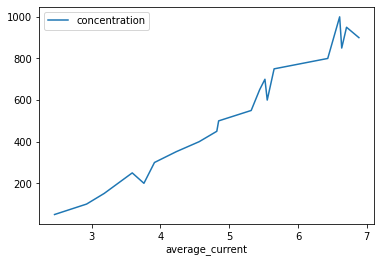

In [ ]:
df_combined.plot("average_current","concentration")

In [ ]:
df_combined.average_current

0      2.460000
1      2.460000
2      2.483298
3      2.506596
4      2.529895
         ...   
206    6.816772
207    6.840070
208    6.863368
209    6.886667
210    6.886667
Name: average_current, Length: 211, dtype: float64

#Linear Regression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_combined.average_current, df_combined.concentration, test_size = 0.2)


In [ ]:
regr = LinearRegression()


In [ ]:
regr.fit(np.array(x_train).reshape(-1,1), y_train)


LinearRegression()

In [ ]:
preds = regr.predict(np.array(x_test).reshape(-1,1))


In [ ]:
y_test.head()


133    550.000000
68     300.000000
72     313.903991
208    906.471735
1       50.000000
Name: concentration, dtype: float64

In [ ]:
preds

array([602.37632167, 304.06307107, 321.95144867, 929.68005429,
        -4.14682751, 751.80826728, 331.83321462, 702.39943756,
       875.3303416 ,  89.72994897, 178.66584247, 692.51767161,
       336.77409759, 149.02054464, 425.7099911 , 880.27122457,
       583.81824622, 885.21210754, 346.65586354, 845.68504376,
       450.41440596, 297.24703381, 410.88734218, 302.18791678,
       816.03974593, 613.46354405, 277.48350192, 860.50769268,
        -4.14682751, 252.77908706, 262.660853  , 470.17793785,
       825.92151187, 568.9955973 , 811.09886295, 667.81325675,
       904.97563943, 475.11882082, 386.18292732, 554.17294838,
       875.24104854, 430.65087407, 895.09387349])

In [ ]:
regr.predict([[6]])

array([746.58462288])

In [ ]:
rmse = mean_squared_error(y, f(x), squared=False)


In [ ]:
rmse

0.0

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2 = r2_score(y, f(x))


In [ ]:
r2

1.0

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
#scores = cross_val_score(regr, x_train, y_train, scoring='r2', cv=folds)
#scores

k = 4
k_fold = KFold(n_splits = k, random_state = None)

score = cross_val_score(regr,np.array(x_train).reshape(-1,1), np.array(y_train).reshape(-1,1), cv = k_fold)
score



array([0.98327033, 0.98947578, 0.98189912, 0.9807597 ])

In [ ]:
print("Mean of Accuracies: {:.2f}" .format(score.mean()))
print("Standard deviation: {:.2f}" .format(score.std()))

Mean of Accuracies: 0.98
Standard deviation: 0.00
